# SCRAPING DATA

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'com.pinterest'

def get_reviews(app_id, lang='id', count=5000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 5000
Contoh ulasan:
{'reviewId': '5290a1e8-fce8-4404-8b61-7ec26fca20bb', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'bagus', 'score': 4, 'thumbsUpCount': 0, 'reviewCreatedVersion': '13.24.0', 'at': datetime.datetime(2025, 6, 29, 14, 48, 55), 'replyContent': None, 'repliedAt': None, 'appVersion': '13.24.0'}


In [ ]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_pinterest.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)


Data berhasil diekspor ke 'hasil_scraper_ulasan_app_pinterest.csv'


In [ ]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_pinterest.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    5000 non-null   object
 1   Username     5000 non-null   object
 2   Rating       5000 non-null   int64 
 3   Review Text  5000 non-null   object
 4   Date         5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


# PREPROECESSING DATA

In [ ]:
import pandas as pd

data = pd.read_csv('Filtered_Data_Selected_Columns_v2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  4644 non-null   object
 1   userName  4644 non-null   object
 2   content   4644 non-null   object
 3   score     4644 non-null   int64 
 4   at        4644 non-null   object
dtypes: int64(1), object(4)
memory usage: 181.5+ KB


HAPUS DUPLIKAT

In [ ]:
data.drop_duplicates(subset="content",keep='first', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 0 to 4643
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  3920 non-null   object
 1   userName  3920 non-null   object
 2   content   3920 non-null   object
 3   score     3920 non-null   int64 
 4   at        3920 non-null   object
dtypes: int64(1), object(4)
memory usage: 183.8+ KB


WORDCLOUD SEBELUM PREPROCESSING

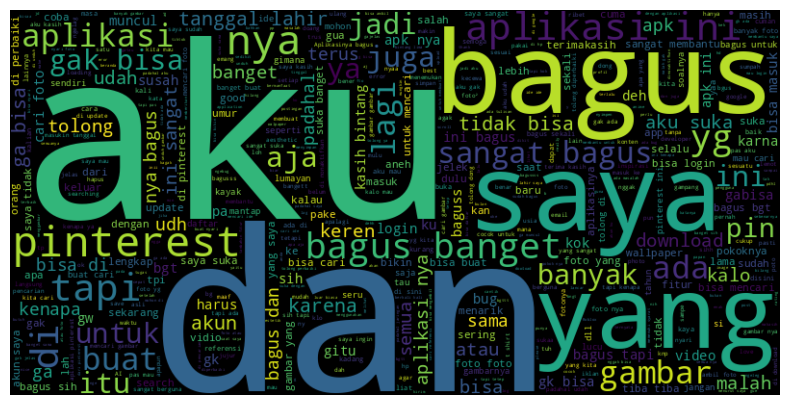

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
data['content'] = data['content'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(data['content'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

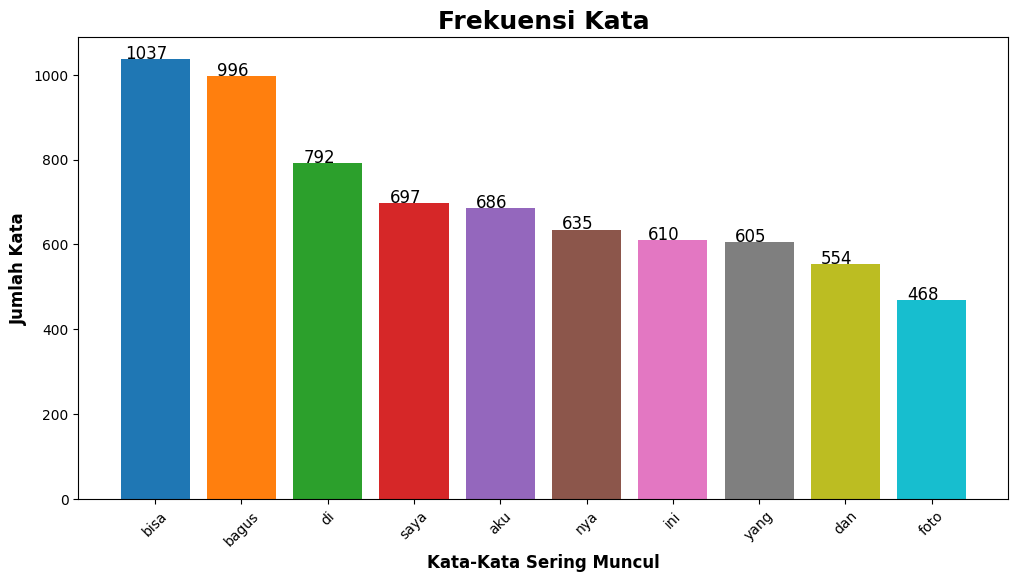

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["content"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

PROSES CLEANING

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

data['cleaning'] = data['content'].apply(lambda x: remove_URL(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_symbols(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_numbers(x))

data.tail(10)

,reviewId,userName,content,score,at,cleaning
4634,1b14cd03-1c9b-41a6-a398-56354a78836d,Orang Asing,gk bisa masuk,1,2025-01-01 07:01:31,gk bisa masuk
4635,185b32c0-b610-4811-a26c-32dd66b5fb1d,Dhira Fathinah,Bagus bgtt cuy aplikasi nyaa walaupun gitu lah...,1,2025-01-01 06:07:12,Bagus bgtt cuy aplikasi nyaa walaupun gitu lah...
4636,a0c10c6d-e4b9-41e9-b2e6-abb6eb4b7258,Nazwa Ameera,Bagus bgt y??,5,2025-01-01 05:54:24,Bagus bgt y
4637,7855a3b1-e5a2-4519-9dbb-d38535bfdf21,Olivia _,waktu dibagian umur sangat sangat 🐷🐷🐷🐷🐷 pokokn...,1,2025-01-01 05:54:05,waktu dibagian umur sangat sangat pokoknya bi...
4638,9bcfc982-25a6-41aa-a0f1-2f5ed9eef336,Kelas 11 IPS 2,"apk nya bagus saya suka,karena mempermudah men...",5,2025-01-01 05:41:43,apk nya bagus saya sukakarena mempermudah menc...
4639,92282ac4-6bcd-42e3-898f-d29292001465,Aang Ksf,aplikasi sangatt bagusss dan membuat inspirasi...,5,2025-01-01 05:27:07,aplikasi sangatt bagusss dan membuat inspirasi...
4640,a44af391-d087-4ce6-a15c-45cf0e9931f2,Heru Santoso,bagus sih tapi semua kenapa ngecopy muka orang...,3,2025-01-01 05:03:46,bagus sih tapi semua kenapa ngecopy muka orang...
4641,6a5f7aac-dce6-479c-924f-338c6d06bf39,Iwan Peyek,Susah login nya,1,2025-01-01 02:23:59,Susah login nya
4642,1ed3dbb0-bf06-4b92-bd6b-26bba38eb1bf,Poniran Wijaya,anggun 5 JIMIN,5,2025-01-01 00:57:53,anggun JIMIN
4643,caecb1ca-7de9-47b9-b442-d036efbd94e1,Mul yono,Suka banget ada banyak gambar jadi aku tinggal...,5,2025-01-01 00:46:25,Suka banget ada banyak gambar jadi aku tinggal...


CASE FOLDING

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

data['case_folding'] = data['cleaning'].apply(case_folding)
data.tail(5)

,reviewId,userName,content,score,at,cleaning,case_folding
4639,92282ac4-6bcd-42e3-898f-d29292001465,Aang Ksf,aplikasi sangatt bagusss dan membuat inspirasi...,5,2025-01-01 05:27:07,aplikasi sangatt bagusss dan membuat inspirasi...,aplikasi sangatt bagusss dan membuat inspirasi...
4640,a44af391-d087-4ce6-a15c-45cf0e9931f2,Heru Santoso,bagus sih tapi semua kenapa ngecopy muka orang...,3,2025-01-01 05:03:46,bagus sih tapi semua kenapa ngecopy muka orang...,bagus sih tapi semua kenapa ngecopy muka orang...
4641,6a5f7aac-dce6-479c-924f-338c6d06bf39,Iwan Peyek,Susah login nya,1,2025-01-01 02:23:59,Susah login nya,susah login nya
4642,1ed3dbb0-bf06-4b92-bd6b-26bba38eb1bf,Poniran Wijaya,anggun 5 JIMIN,5,2025-01-01 00:57:53,anggun JIMIN,anggun jimin
4643,caecb1ca-7de9-47b9-b442-d036efbd94e1,Mul yono,Suka banget ada banyak gambar jadi aku tinggal...,5,2025-01-01 00:46:25,Suka banget ada banyak gambar jadi aku tinggal...,suka banget ada banyak gambar jadi aku tinggal...


NORMALISASI KATA

In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data =  pd.DataFrame(data[['at','userName','score','content','cleaning','case_folding']])
data.head(5)

,at,userName,score,content,cleaning,case_folding
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

data =  pd.DataFrame(data[['at','userName','score','content','cleaning','case_folding','normalisasi']])

data.head(20)

,at,userName,score,content,cleaning,case_folding,normalisasi
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...
5,2025-04-30 15:53:43,Rivano,4,Karena dapat membantu pada saat saya sedang me...,Karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...
6,2025-04-30 15:38:28,hesaputra Hesaputra,5,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration ini my business acti...
7,2025-04-30 14:55:04,Rosid Intan,1,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya kalau boleh jujur aplikasi sudah pa...
8,2025-04-30 13:48:44,Slash,1,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog banget sih sistem kalian tidak bisa...
9,2025-04-30 13:47:21,Heri Susanto,1,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest sekarang aplikasi ya jadi burik lemo...


TOKENIZATION

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

data['tokenize'] = data['normalisasi'].apply(tokenize)

data.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,"[bagus, banget, foto, serba, ada]"
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,"[good, everytime]"
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,"[foto, photo]"
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,"[luar, biasa, bagus]"
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,"[bagus, banget, tapi, begini, di, hp, ku, kena..."


STOPWORD REMOVAL

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

data['stopword removal'] = data['tokenize'].apply(lambda x: remove_stopwords(x))

data.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,"[bagus, banget, foto, serba, ada]","[bagus, banget, foto, serba]"
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,"[good, everytime]","[good, everytime]"
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,"[foto, photo]","[foto, photo]"
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,"[luar, biasa, bagus]",[bagus]
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,"[bagus, banget, tapi, begini, di, hp, ku, kena...","[bagus, banget, hp, ku, ambil, video, tolong, ..."


STEMMING DATA

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['stemming_data'] = data['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
data.head(5)

,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,"[bagus, banget, foto, serba, ada]","[bagus, banget, foto, serba]",bagus banget foto serba
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,"[good, everytime]","[good, everytime]",good everytime
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,"[foto, photo]","[foto, photo]",foto photo
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,"[luar, biasa, bagus]",[bagus],bagus
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,"[bagus, banget, tapi, begini, di, hp, ku, kena...","[bagus, banget, hp, ku, ambil, video, tolong, ...",bagus banget hp ku ambil video tolong baik ya ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 0 to 4643
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                3920 non-null   object
 1   userName          3920 non-null   object
 2   score             3920 non-null   int64 
 3   content           3920 non-null   object
 4   cleaning          3920 non-null   object
 5   case_folding      3920 non-null   object
 6   normalisasi       3920 non-null   object
 7   tokenize          3920 non-null   object
 8   stopword removal  3920 non-null   object
 9   stemming_data     3920 non-null   object
dtypes: int64(1), object(9)
memory usage: 465.9+ KB


PROSES HAPUS DATA BERNILAI KOSONG

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 0 to 4643
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                3920 non-null   object
 1   userName          3920 non-null   object
 2   score             3920 non-null   int64 
 3   content           3920 non-null   object
 4   cleaning          3920 non-null   object
 5   case_folding      3920 non-null   object
 6   normalisasi       3920 non-null   object
 7   tokenize          3920 non-null   object
 8   stopword removal  3920 non-null   object
 9   stemming_data     3920 non-null   object
dtypes: int64(1), object(9)
memory usage: 465.9+ KB


WORDCLOUD SETELAH PREPROCESSING

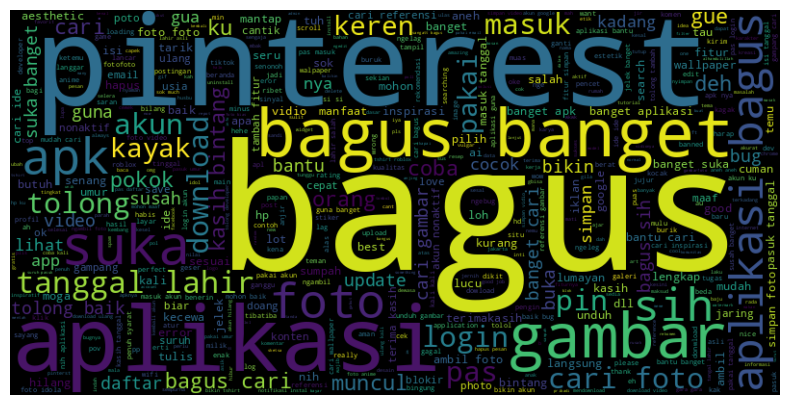

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
# df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(data['stemming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

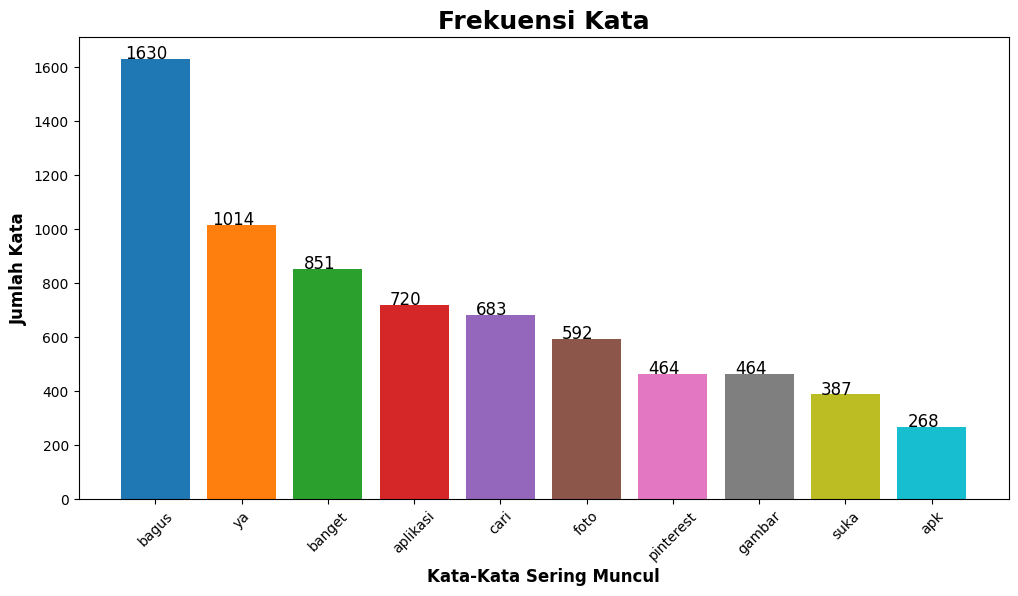

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["stemming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

In [ ]:
data.to_csv('Preprocessed_Data_v2.csv', encoding= 'utf8',index=False);

# LABELLING DATA

In [ ]:
import pandas as pd

data = pd.read_csv('Preprocessed_Data_v2.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                3920 non-null   object
 1   userName          3920 non-null   object
 2   score             3920 non-null   int64 
 3   content           3920 non-null   object
 4   cleaning          3859 non-null   object
 5   case_folding      3859 non-null   object
 6   normalisasi       3837 non-null   object
 7   tokenize          3920 non-null   object
 8   stopword removal  3920 non-null   object
 9   stemming_data     3814 non-null   object
dtypes: int64(1), object(9)
memory usage: 306.4+ KB


,at,userName,score,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,"['bagus', 'banget', 'foto', 'serba', 'ada']","['bagus', 'banget', 'foto', 'serba']",bagus banget foto serba
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,"['good', 'everytime']","['good', 'everytime']",good everytime
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,"['foto', 'photo']","['foto', 'photo']",foto photo
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,"['luar', 'biasa', 'bagus']",['bagus'],bagus
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,"['bagus', 'banget', 'tapi', 'begini', 'di', 'h...","['bagus', 'banget', 'hp', 'ku', 'ambil', 'vide...",bagus banget hp ku ambil video tolong baik ya ...


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3814 entries, 0 to 3919
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   at                3814 non-null   object
 1   userName          3814 non-null   object
 2   score             3814 non-null   int64 
 3   content           3814 non-null   object
 4   cleaning          3814 non-null   object
 5   case_folding      3814 non-null   object
 6   normalisasi       3814 non-null   object
 7   tokenize          3814 non-null   object
 8   stopword removal  3814 non-null   object
 9   stemming_data     3814 non-null   object
dtypes: int64(1), object(9)
memory usage: 327.8+ KB


In [ ]:
data = pd.DataFrame(data[['at','userName','score','content','cleaning','case_folding','normalisasi','stemming_data']])
data.head()

,at,userName,score,content,cleaning,case_folding,normalisasi,stemming_data
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,good everytime
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,foto photo
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,bagus
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,bagus banget hp ku ambil video tolong baik ya ...


In [ ]:
data['sentiment'] = data['score'].apply(lambda x: 'Negatif' if x <= 3 else ('Positif'))
data.head(20)

,at,userName,score,content,cleaning,case_folding,normalisasi,stemming_data,sentiment
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba,Positif
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,good everytime,Positif
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,foto photo,Positif
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,bagus,Positif
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,bagus banget hp ku ambil video tolong baik ya ...,Positif
5,2025-04-30 15:53:43,Rivano,4,Karena dapat membantu pada saat saya sedang me...,Karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,bantu butuh,Positif
6,2025-04-30 15:38:28,hesaputra Hesaputra,5,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration ini my business acti...,sources of my inspiration my business activities,Positif
7,2025-04-30 14:55:04,Rosid Intan,1,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya kalau boleh jujur aplikasi sudah pa...,jujur aplikasi pas ya kenpa pas pasuk tanggal ...,Negatif
8,2025-04-30 13:48:44,Slash,1,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog banget sih sistem kalian tidak bisa...,goblog banget sih sistem filter orang menguplo...,Negatif
9,2025-04-30 13:47:21,Heri Susanto,1,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest sekarang aplikasi ya jadi burik lemo...,pinterest aplikasi ya burik lot bug sinyal muter,Negatif


/tmp/ipython-input-1588499961.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


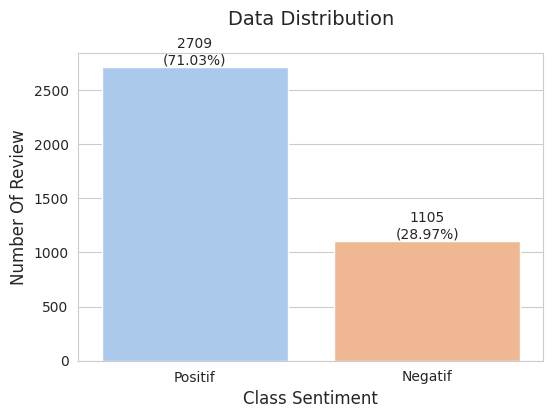

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Data Distribution', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Number Of Review', fontsize=12)

total = len(data['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Labeled_Data_v2.csv', encoding= 'utf8',index=False);

WORDCLOUD

In [ ]:
import pandas as pd

data = pd.read_csv('Labeled_Data_v2.csv')
data.head(20)

,at,userName,score,content,cleaning,case_folding,normalisasi,stemming_data,sentiment
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba,Positif
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,good everytime,Positif
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,foto photo,Positif
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,bagus,Positif
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,bagus banget hp ku ambil video tolong baik ya ...,Positif
5,2025-04-30 15:53:43,Rivano,4,Karena dapat membantu pada saat saya sedang me...,Karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,bantu butuh,Positif
6,2025-04-30 15:38:28,hesaputra Hesaputra,5,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration ini my business acti...,sources of my inspiration my business activities,Positif
7,2025-04-30 14:55:04,Rosid Intan,1,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya kalau boleh jujur aplikasi sudah pa...,jujur aplikasi pas ya kenpa pas pasuk tanggal ...,Negatif
8,2025-04-30 13:48:44,Slash,1,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog banget sih sistem kalian tidak bisa...,goblog banget sih sistem filter orang menguplo...,Negatif
9,2025-04-30 13:47:21,Heri Susanto,1,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest sekarang aplikasi ya jadi burik lemo...,pinterest aplikasi ya burik lot bug sinyal muter,Negatif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')

In [ ]:
#Fungsi untuk membuat dan menampilkan word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

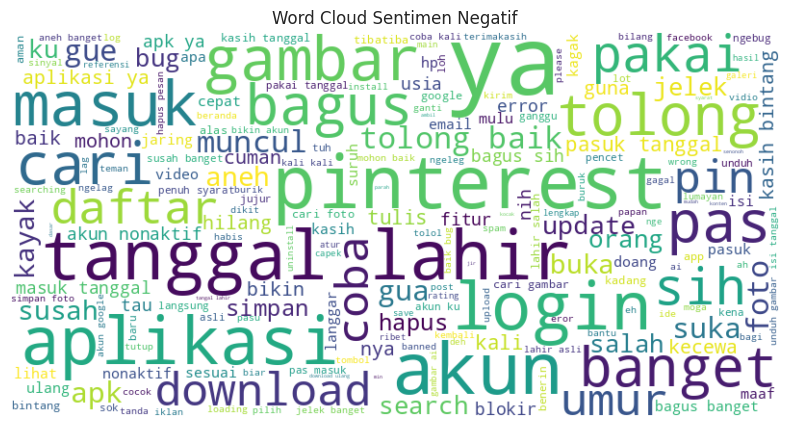

In [ ]:
# wordcloud sentimen negatif
create_wordcloud(sentimen_negatif, 'Word Cloud Sentimen Negatif')

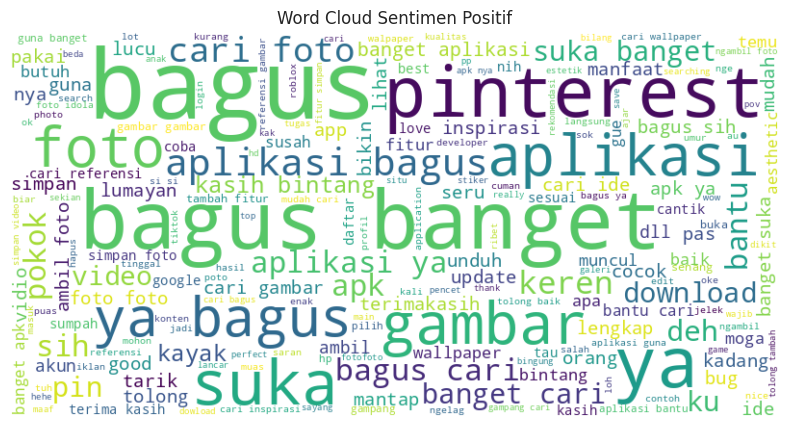

In [ ]:
# wordcloud sentimen positif
create_wordcloud(sentimen_positif, 'Word Cloud Sentimen Positif')

# SVM

In [ ]:
import pandas as pd

file_path = 'Labeled_Data_v2.csv'
data = pd.read_csv(file_path)

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   at             3814 non-null   object
 1   userName       3814 non-null   object
 2   score          3814 non-null   int64 
 3   content        3814 non-null   object
 4   cleaning       3814 non-null   object
 5   case_folding   3814 non-null   object
 6   normalisasi    3814 non-null   object
 7   stemming_data  3814 non-null   object
 8   sentiment      3814 non-null   object
dtypes: int64(1), object(8)
memory usage: 268.3+ KB


,at,userName,score,content,cleaning,case_folding,normalisasi,stemming_data,sentiment
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba,Positif
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,good everytime,Positif
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,foto photo,Positif
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,bagus,Positif
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,bagus banget hp ku ambil video tolong baik ya ...,Positif
5,2025-04-30 15:53:43,Rivano,4,Karena dapat membantu pada saat saya sedang me...,Karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,bantu butuh,Positif
6,2025-04-30 15:38:28,hesaputra Hesaputra,5,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration ini my business acti...,sources of my inspiration my business activities,Positif
7,2025-04-30 14:55:04,Rosid Intan,1,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya kalau boleh jujur aplikasi sudah pa...,jujur aplikasi pas ya kenpa pas pasuk tanggal ...,Negatif
8,2025-04-30 13:48:44,Slash,1,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog banget sih sistem kalian tidak bisa...,goblog banget sih sistem filter orang menguplo...,Negatif
9,2025-04-30 13:47:21,Heri Susanto,1,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest sekarang aplikasi ya jadi burik lemo...,pinterest aplikasi ya burik lot bug sinyal muter,Negatif


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_data = data.dropna(subset=['stemming_data'])

x = cleaned_data['stemming_data']
y = cleaned_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('=============================')

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit dan transform data pelatihan
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform data pengujian
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Jumlah data latih: 3051
Jumlah data uji: 763


In [ ]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [ ]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [ ]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_tfidf.toarray())

# menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_tfidf[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.23252798 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.23252798 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

# Pastikan tfidf_vectorizer sudah di-fit
idf_weights = tfidf_vectorizer.idf_

# Membuat DataFrame untuk melihat kata beserta bobot IDF-nya
import pandas as pd
df_idf = pd.DataFrame({
    'kata': feature_names,
    'bobot_idf': idf_weights
})

# Mengurutkan berdasarkan bobot IDF (opsional, untuk melihat kata paling langka/penting)
df_idf_sorted_desc = df_idf.sort_values(by='bobot_idf', ascending=False)
df_idf_sorted_asc = df_idf.sort_values(by='bobot_idf', ascending=True)

print("\nWords with the Highest IDF Weight (rarest/unique)):")
print(df_idf_sorted_desc.head())

print("\nWords with the Lowest IDF Weight (most common in many documents)):")
print(df_idf_sorted_asc.head())


Words with the Highest IDF Weight (rarest/unique)):
       kata  bobot_idf
3775  yesus   8.553549
3774    yes   8.553549
3772   yeah   8.553549
3771     ye   8.553549
3770    yay   8.553549

Words with the Lowest IDF Weight (most common in many documents)):
          kata  bobot_idf
312      bagus   1.958452
3754        ya   2.609438
373     banget   2.634655
209   aplikasi   2.820207
680       cari   2.906337


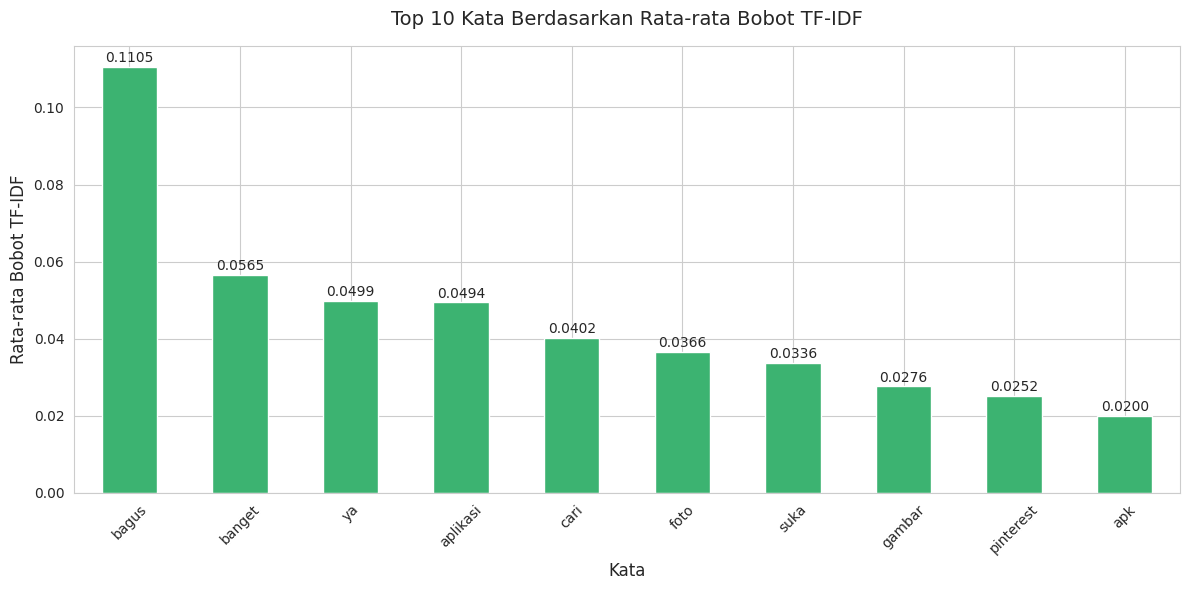

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ambil teks dari kolom 'stemming_data'
texts = data['stemming_data'].astype(str)

# 2. Buat objek TF-IDF dan transform teks
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# 3. Hitung rata-rata bobot TF-IDF untuk setiap kata
avg_tfidf = tfidf_matrix.mean(axis=0).A1  # Konversi sparse matrix ke array 1D
vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = list(zip(vocab, avg_tfidf))

# 4. Ambil Top 20 kata dengan skor tertinggi
top_10 = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:10]
top_words_series = pd.Series(dict(top_10)).sort_values(ascending=False)

# 5. Plot grafik batang dengan label angka
plt.figure(figsize=(12, 6))
ax = top_words_series.plot(kind='bar', color='mediumseagreen')

plt.title('Top 10 Kata Berdasarkan Rata-rata Bobot TF-IDF', fontsize=14, pad=15)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Rata-rata Bobot TF-IDF', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan angka pasti di atas setiap bar
for i, (word, value) in enumerate(top_words_series.items()):
    plt.text(i, value + 0.0005, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


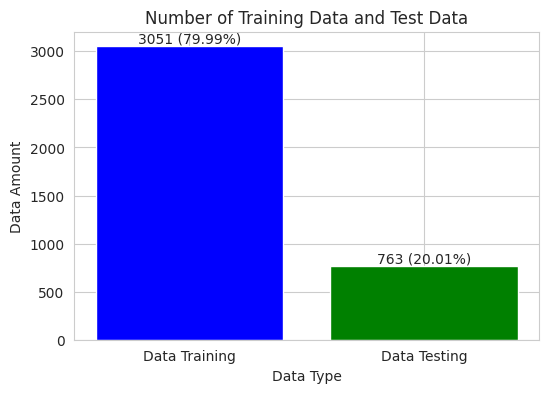

In [ ]:
import matplotlib.pyplot as plt



train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'green'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/ 2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')


plt.title('Number of Training Data and Test Data')
plt.xlabel('Data Type')
plt.ylabel('Data Amount')
plt.show()

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(C=1, kernel='linear',probability=True)

# Melatih model menggunakan data pelatihan
svm_model.fit(X_train_tfidf, y_train)


SVC(C=1, kernel='linear', probability=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Prediksi hasil label
y_pred = svm_model.predict(X_test_tfidf)

# Prediksi probabilitas untuk ROC AUC
y_proba = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Ubah label Positif/Negatif jadi angka
y_true_binary = y_test.map({'Negatif': 0, 'Positif': 1})

# Evaluasi
print('Accuracy  = ', round(accuracy_score(y_test, y_pred) * 100, 2), '%')
print('Recall    = ', round(recall_score(y_test, y_pred, average='macro') * 100, 2), '%')
print('Precision = ', round(precision_score(y_test, y_pred, average='macro') * 100, 2), '%')
print('F1-Score  = ', round(f1_score(y_test, y_pred, average='macro') * 100, 2), '%')
print('ROC AUC   = ', round(roc_auc_score(y_true_binary, y_proba) * 100, 2), '%')

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy  =  86.76 %
Recall    =  82.11 %
Precision =  84.84 %
F1-Score  =  83.29 %
ROC AUC   =  91.12 %

Confusion Matrix:
 [[157  64]
 [ 37 505]]


In [ ]:
# 1. Buat DataFrame baru yang berisi data uji (untuk menjaga data asli tetap utuh)
# Kita gunakan .loc[X_test.index] untuk mengambil baris asli dari 'cleaned_data' yang masuk ke dalam set pengujian.
df_hasil_tes = cleaned_data.loc[X_test.index].copy()

# 2. Tambahkan kolom baru 'prediksi_sentimen' yang berisi hasil prediksi dari model (y_pred)
df_hasil_tes['prediksi_sentimen'] = y_pred

# 3. Buat DataFrame baru yang hanya berisi ulasan yang salah diklasifikasi
# Kondisinya adalah ketika nilai di kolom 'sentiment' (aktual) TIDAK SAMA DENGAN nilai di kolom 'prediksi_sentimen'
df_salah_prediksi = df_hasil_tes[df_hasil_tes['sentiment'] != df_hasil_tes['prediksi_sentimen']]

# 4. Tampilkan beberapa ulasan yang salah diprediksi
# Kita tampilkan kolom-kolom yang relevan: ulasan asli, skor, sentimen aktual, dan sentimen prediksi
print("Menampilkan Ulasan yang Salah Diprediksi oleh Model:")
print(df_salah_prediksi[['content', 'score', 'sentiment', 'prediksi_sentimen']].head(30))

Menampilkan Ulasan yang Salah Diprediksi oleh Model:
                                                content  score sentiment  \
3043  Aplikasi Nya bagus tapi.... Kadang bermasalah ...      3   Negatif   
3548  BAGUS BANGET, CUMA SUKA KE LOG OUT SENDIRI TER...      3   Negatif   
1056                                        search eror      4   Positif   
789                                             bugging      1   Negatif   
991                         ngelag, cepetan di perbaiki      1   Negatif   
3802    apk nya bagus tapi ko ga bisa buat main game ya      2   Negatif   
2704                              Makasih Iya Pinterest      1   Negatif   
1674                                aplikasi ga berguna      1   Negatif   
2245                                    apk yg gk jelas      1   Negatif   
247                               gimana cara masuknyaa      3   Negatif   
3089  sering bug, dan tiba-tiba nggak bisa buat dige...      4   Positif   
143                              ba

In [ ]:
from sklearn.model_selection import GridSearchCV

# Mencari parameter terbaik menggunakan GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'kernel': 'linear'}


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation untuk mengevaluasi kinerja model
cv_scores = cross_val_score(SVC(kernel='linear'), X_train_tfidf, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.8608838  0.8557377  0.85737705 0.85901639 0.88360656]
Average Cross-Validation Score: 0.8633243003944084


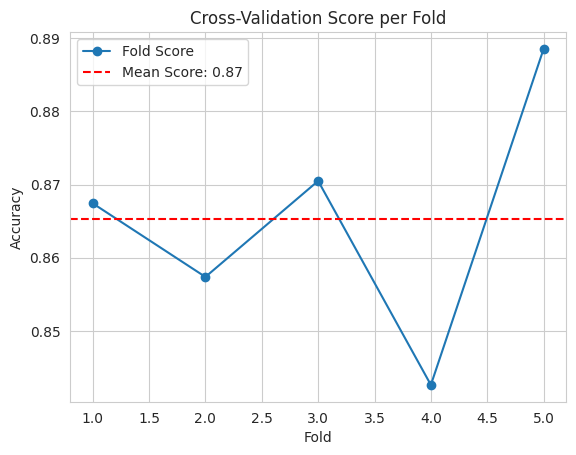

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# --- 1. Baca dataset ---
data = pd.read_csv("train_data.csv")  # ganti sesuai nama file
X = data['text']   # kolom ulasan
y = data['sentiment']  # kolom label sentimen

# --- 2. TF-IDF ---
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# --- 3. Model SVM ---
model = svm.SVC(kernel="linear", C=1)

# --- 4. Cross Validation ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_tfidf, y, cv=cv)

# --- 5. Visualisasi ---
plt.plot(range(1, len(scores)+1), scores, marker='o', label="Fold Score")
plt.axhline(scores.mean(), color='red', linestyle='--', label=f"Mean Score: {scores.mean():.2f}")
plt.title("Cross-Validation Score per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


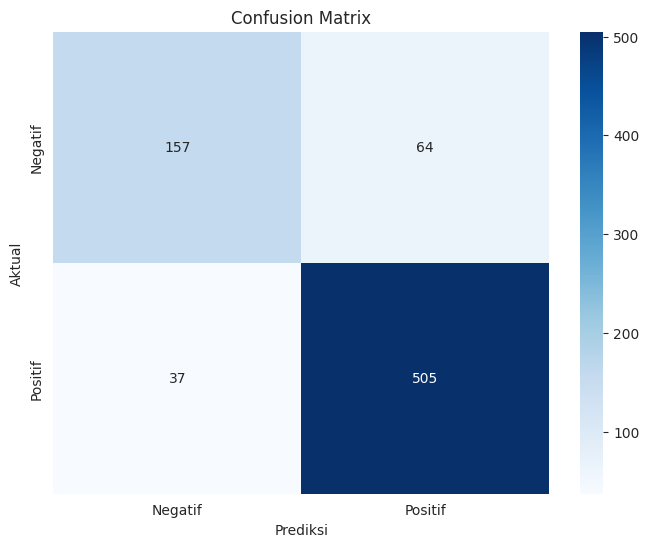

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


# WORDCLOUD

In [ ]:
import pandas as pd

data = pd.read_csv("Labeled_Data_v2.csv")
data.head(20)

,at,userName,score,content,cleaning,case_folding,normalisasi,stemming_data,sentiment
0,2025-04-30 23:01:57,Irwan Drmwn,5,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba ada,bagus banget foto serba,Positif
1,2025-04-30 22:32:38,Dedy Kennedy,4,good everytime,good everytime,good everytime,good everytime,good everytime,Positif
2,2025-04-30 16:15:53,Rohmatun Danuri,5,foto photo,foto photo,foto photo,foto photo,foto photo,Positif
3,2025-04-30 15:57:09,Asnita (Ita),5,luar biasa bagus,luar biasa bagus,luar biasa bagus,luar biasa bagus,bagus,Positif
4,2025-04-30 15:55:08,Ica 2345,5,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di HP ku kenapa setiap ...,bagus banget tapi gini di hp ku kenapa setiap ...,bagus banget tapi begini di hp ku kenapa setia...,bagus banget hp ku ambil video tolong baik ya ...,Positif
5,2025-04-30 15:53:43,Rivano,4,Karena dapat membantu pada saat saya sedang me...,Karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,karena dapat membantu pada saat saya sedang me...,bantu butuh,Positif
6,2025-04-30 15:38:28,hesaputra Hesaputra,5,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration in my business activ...,sources of my inspiration ini my business acti...,sources of my inspiration my business activities,Positif
7,2025-04-30 14:55:04,Rosid Intan,1,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya klo boleh jujur aplikasi udh pas ta...,sebenarnya kalau boleh jujur aplikasi sudah pa...,jujur aplikasi pas ya kenpa pas pasuk tanggal ...,Negatif
8,2025-04-30 13:48:44,Slash,1,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog bgt sih sistem kalian gak bisa memf...,kok goblog banget sih sistem kalian tidak bisa...,goblog banget sih sistem filter orang menguplo...,Negatif
9,2025-04-30 13:47:21,Heri Susanto,1,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest skrg aplikasi y jadi burik lemot bug...,pinterest sekarang aplikasi ya jadi burik lemo...,pinterest aplikasi ya burik lot bug sinyal muter,Negatif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

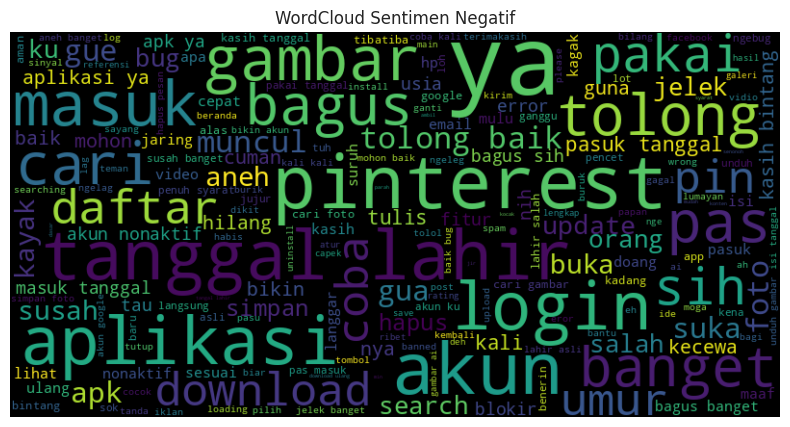

In [ ]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

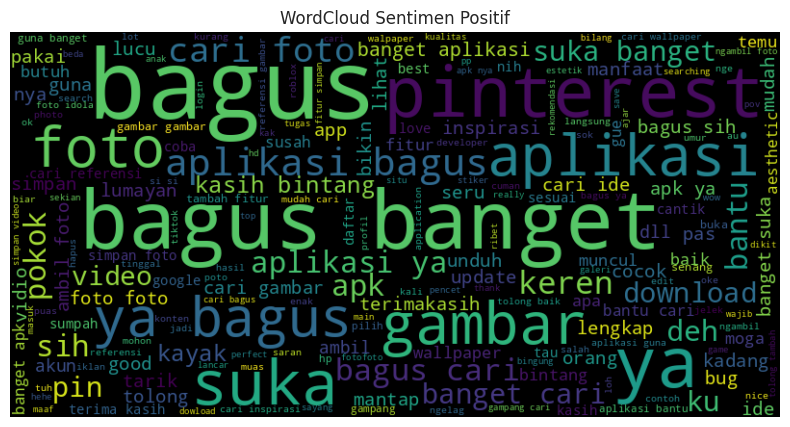

In [ ]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

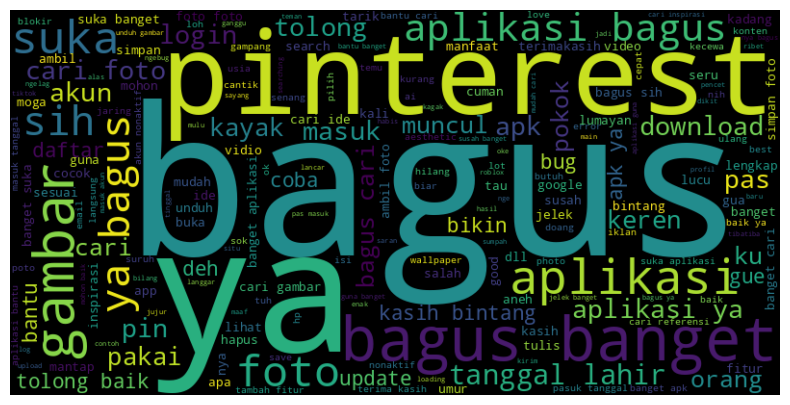

In [ ]:
text = ' '.join(data['stemming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

# RATING

In [ ]:
import pandas as pd

data = pd.read_csv("Labeled_Data_v2.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   at             3814 non-null   object
 1   userName       3814 non-null   object
 2   score          3814 non-null   int64 
 3   content        3814 non-null   object
 4   cleaning       3814 non-null   object
 5   case_folding   3814 non-null   object
 6   normalisasi    3814 non-null   object
 7   stemming_data  3814 non-null   object
 8   sentiment      3814 non-null   object
dtypes: int64(1), object(8)
memory usage: 268.3+ KB


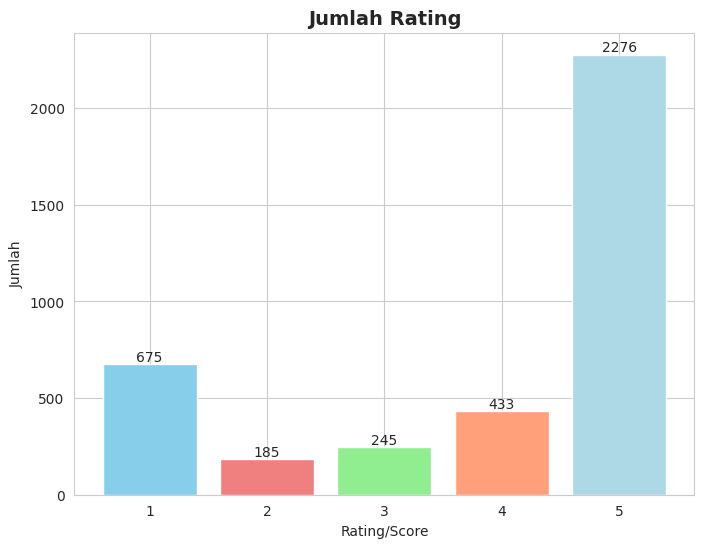

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()